In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

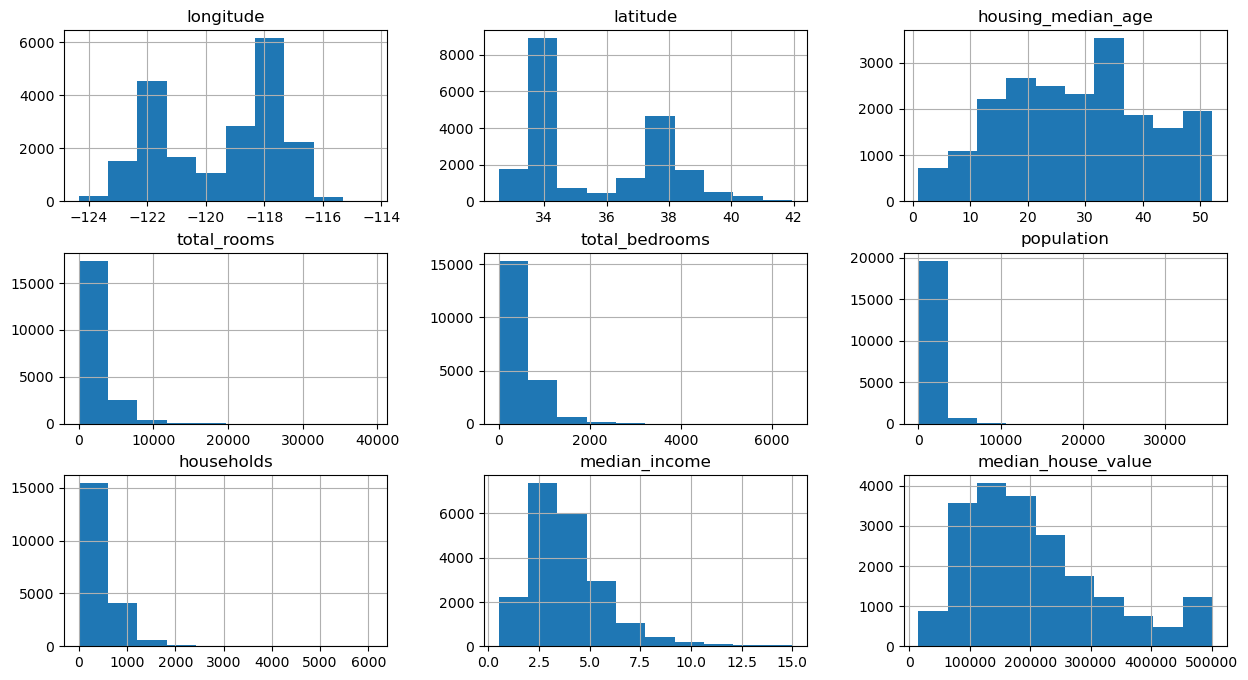

In [7]:
data.hist(figsize=(15,8))

In [8]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

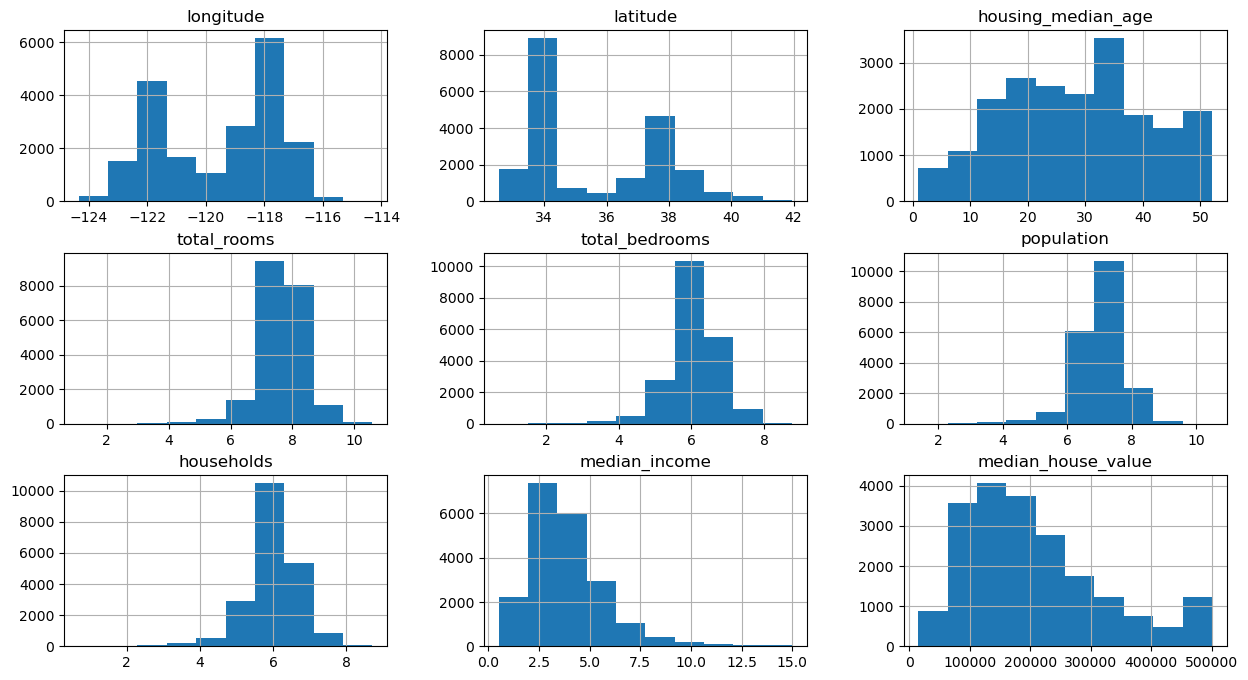

In [9]:
data.hist(figsize=(15,8))

In [10]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [11]:
data = data.join(pd.get_dummies(data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [12]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


<Axes: >

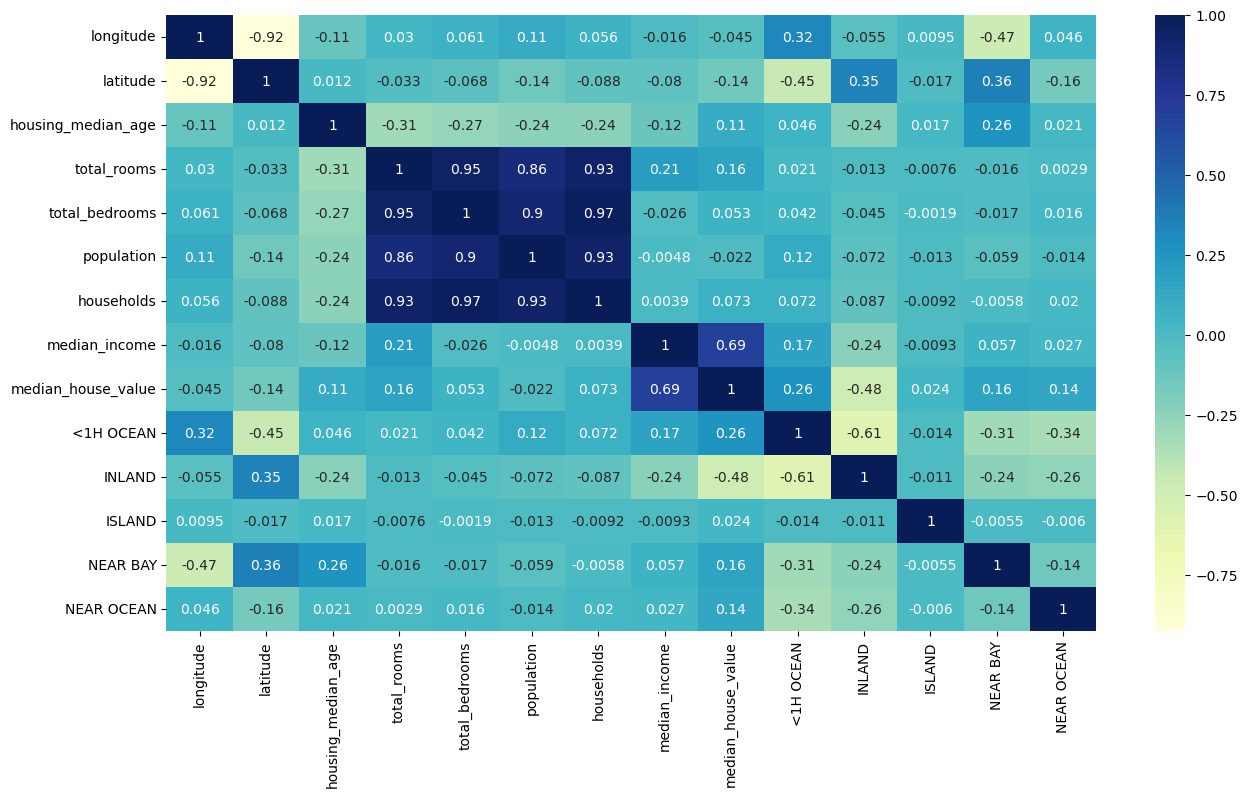

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

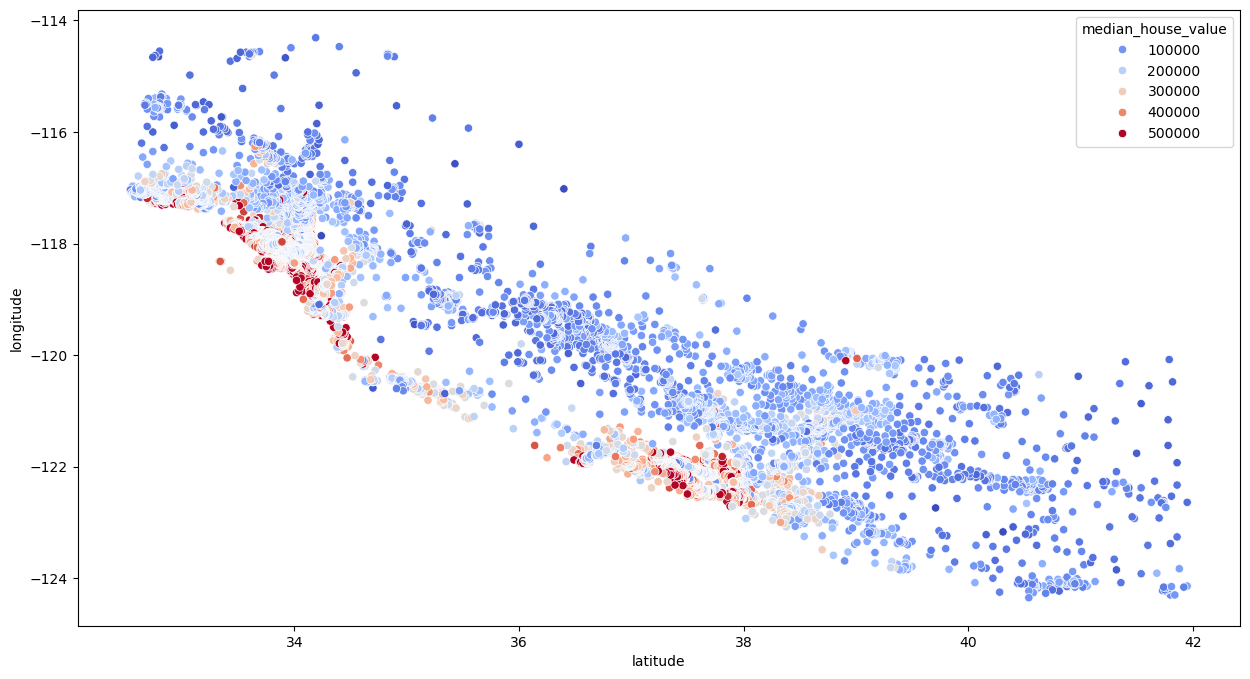

In [14]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")

In [15]:
data['income_ratio'] = data['median_income'] / data['households']
data['household_rooms'] = data['total_rooms'] / data['households']
data['coastal_proximity'] = 0.26*data['<1H OCEAN']+ 0.16*data['NEAR BAY'] + 0.14*data['NEAR OCEAN']


<Axes: >

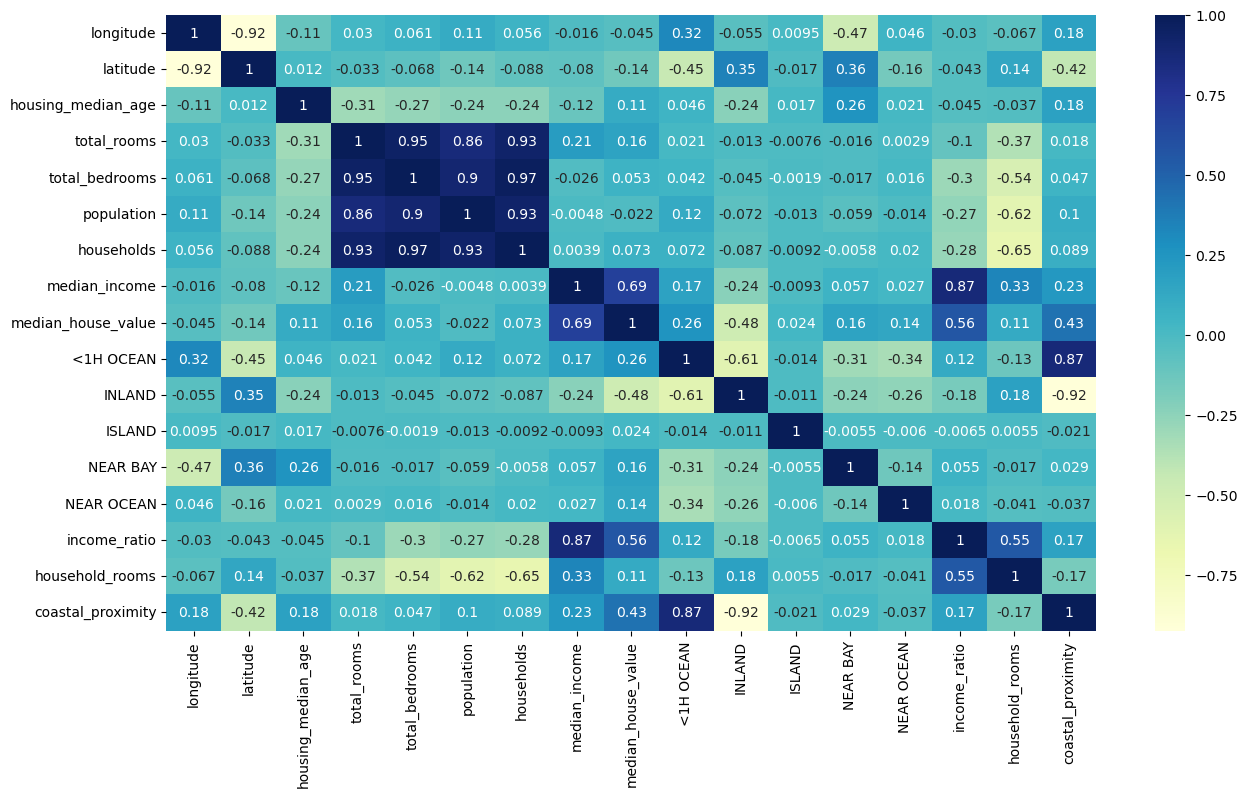

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

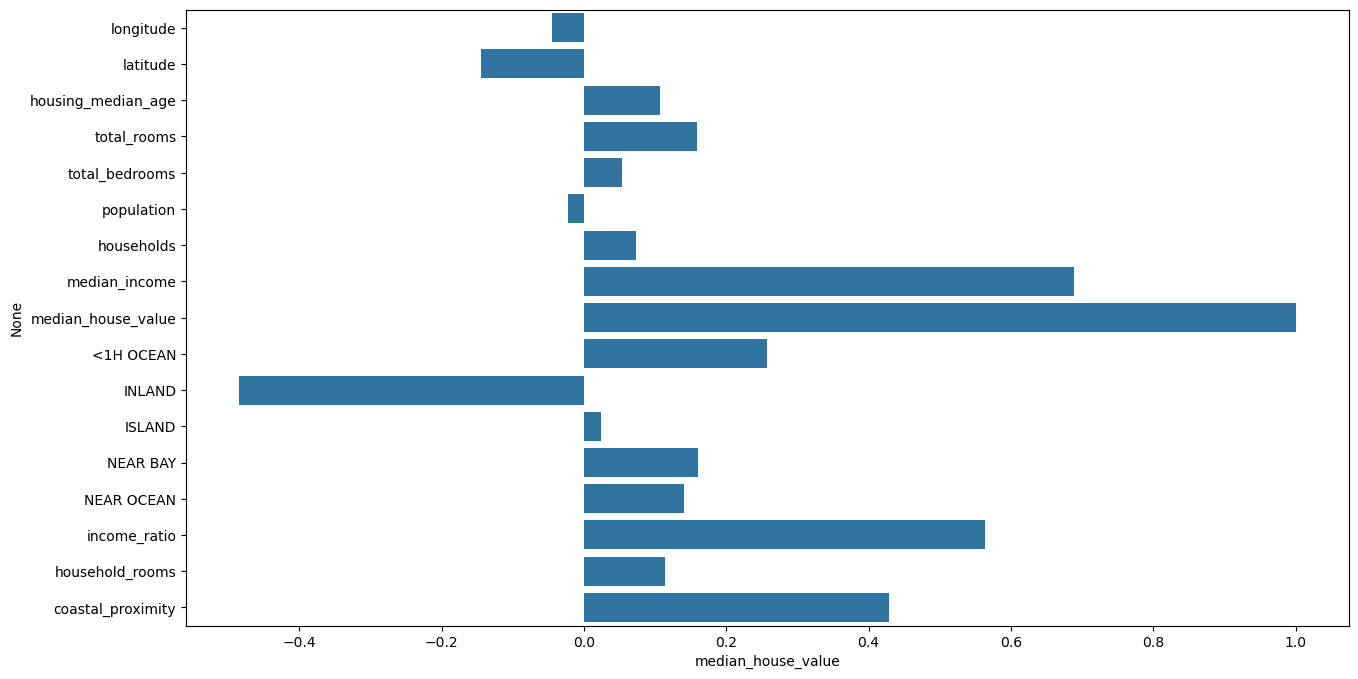

In [17]:
df_corr = data.corr()['median_house_value']

plt.figure(figsize=(15,8))
sns.barplot(x=df_corr, y=df_corr.index)
plt.show()

In [18]:
features = df_corr[df_corr > 0.01].drop('median_house_value').index
list(features)

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'households',
 'median_income',
 '<1H OCEAN',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN',
 'income_ratio',
 'household_rooms',
 'coastal_proximity']

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape

((16346, 16), (4087, 16))

In [21]:
train_data = X_train.join(y_train)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_ratio,household_rooms,coastal_proximity,median_house_value
489,-122.25,37.86,48.0,7.675082,6.249975,7.412764,6.131226,3.0417,0,0,0,1,0,0.496100,1.251802,0.16,489600.0
2117,-119.73,36.76,30.0,7.345365,5.645447,6.787845,5.743003,3.1000,0,1,0,0,0,0.539787,1.279011,0.00,71300.0
18861,-122.19,38.13,5.0,8.968906,7.277248,8.380686,7.241366,4.9504,0,0,0,1,0,0.683628,1.238565,0.16,214800.0
6855,-118.15,34.06,28.0,8.257386,6.827629,7.831220,6.774224,3.5050,1,0,0,0,0,0.517402,1.218942,0.26,204300.0
5321,-118.43,34.05,52.0,7.434848,5.673323,6.590301,5.723585,6.7115,1,0,0,0,0,1.172604,1.298984,0.26,500001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,7.303170,5.690359,6.834109,5.690359,5.1418,1,0,0,0,0,0.903598,1.283429,0.26,190300.0
17455,-120.43,34.70,26.0,7.763871,5.966147,7.259116,5.966147,3.8700,0,0,0,0,1,0.648660,1.301321,0.14,125800.0
5249,-118.45,34.08,52.0,7.313887,5.176150,5.953243,4.983607,7.1576,1,0,0,0,0,1.436229,1.467589,0.26,500001.0
12290,-116.97,33.94,29.0,8.070281,6.450470,7.451822,6.403574,3.0432,0,1,0,0,0,0.475235,1.260278,0.00,91200.0


In [23]:
test_data = X_test.join(y_test)

In [24]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_ratio,household_rooms,coastal_proximity,median_house_value
6715,-118.18,34.14,38.0,8.019613,6.190315,7.031741,6.144186,7.7116,1,0,0,0,0,1.255105,1.305236,0.26,360900.0
4121,-118.19,34.14,38.0,7.510431,5.707110,6.677083,5.697093,5.2962,1,0,0,0,0,0.929632,1.318292,0.26,291500.0
15433,-117.25,33.20,10.0,7.626083,6.161207,7.172425,6.156979,2.7961,1,0,0,0,0,0.454135,1.238608,0.26,131300.0
20272,-119.23,34.19,16.0,8.575085,6.698268,7.306531,6.504288,6.4522,0,0,0,0,1,0.991992,1.318374,0.14,500001.0
11843,-120.93,39.96,15.0,7.418781,5.863631,6.705639,5.758902,2.9559,0,1,0,0,0,0.513275,1.288228,0.00,118800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,-118.08,34.16,42.0,8.157944,6.501290,7.446585,6.431331,4.5461,0,1,0,0,0,0.706868,1.268469,0.00,242400.0
9862,-121.85,36.60,21.0,7.775696,6.553933,7.142827,6.492240,2.5372,1,0,0,0,0,0.390805,1.197691,0.26,218000.0
9456,-123.71,39.88,42.0,7.325808,5.950643,6.487684,5.717028,1.4952,0,0,0,0,1,0.261535,1.281401,0.14,69800.0
17145,-122.18,37.44,44.0,7.713338,5.852202,6.855409,5.849325,8.2436,0,0,0,0,1,1.409325,1.318672,0.14,500001.0


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [26]:
X_test_s = scaler.fit_transform(X_test)
pred1 = reg.predict(X_test_s)

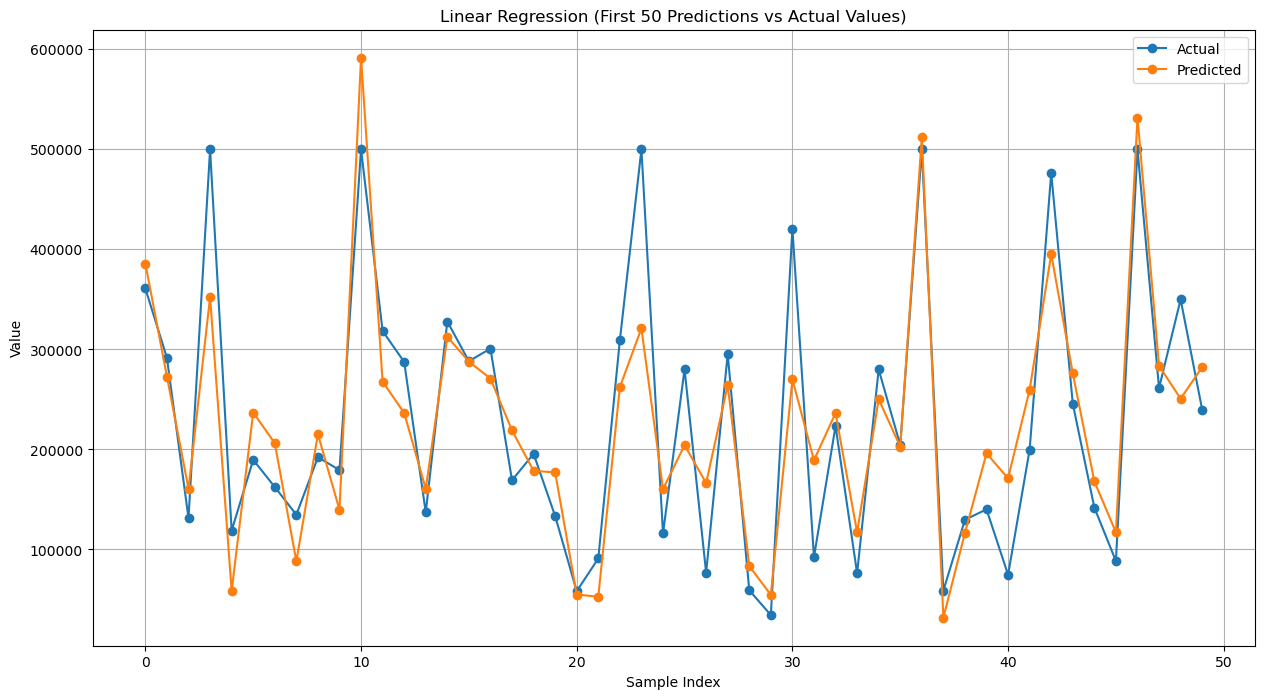

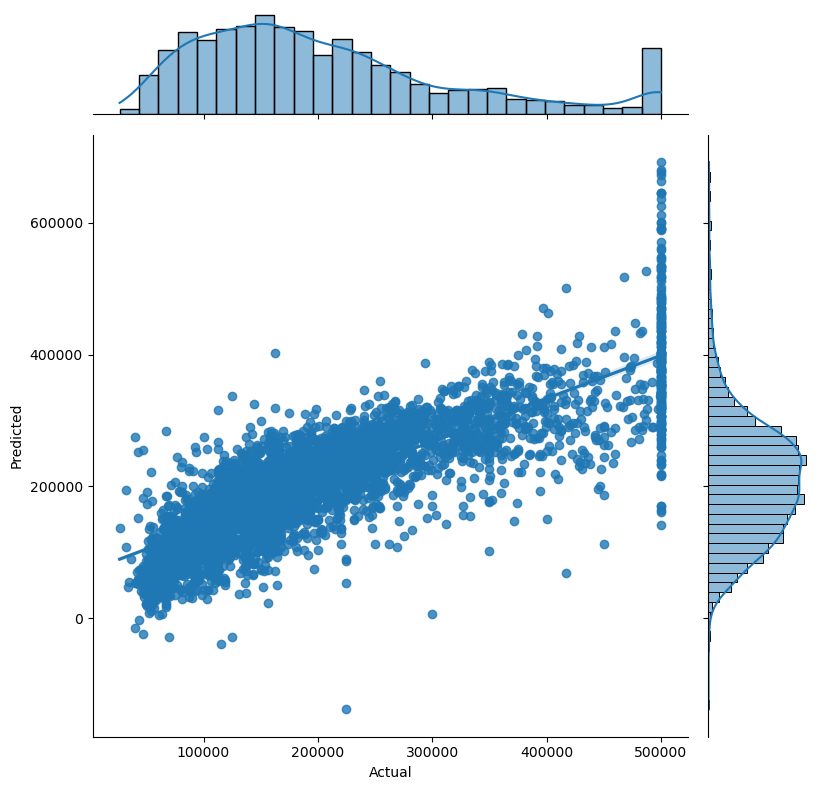

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred1}).reset_index(drop=True)

plt.figure(figsize=(15, 8))
plt.plot(df['Actual'][:50], label='Actual', marker='o')
plt.plot(df['Predicted'][:50], label='Predicted', marker='o')
plt.legend()
plt.title('Linear Regression (First 50 Predictions vs Actual Values)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

sns.jointplot(x='Actual', y='Predicted', data=df, kind='reg', height=8)


In [28]:
print(f'r2 score : {reg.score(X_test_s, y_test)}')


r2 score : 0.6771720795201471


In [29]:
lr_score = reg.score(X_test_s, y_test)
lr_rmse = np.sqrt(mean_squared_error(y_test,pred1))

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)


RandomForestRegressor()

In [31]:
pred2 = forest.predict(X_test_s)

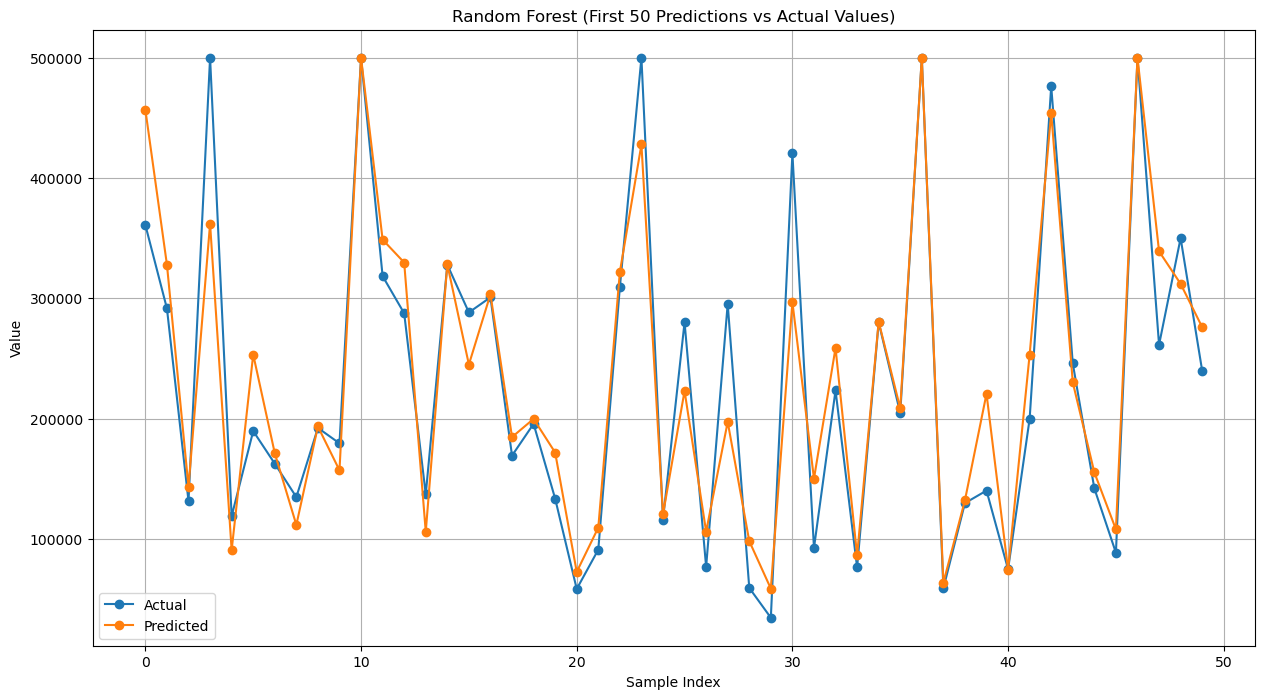

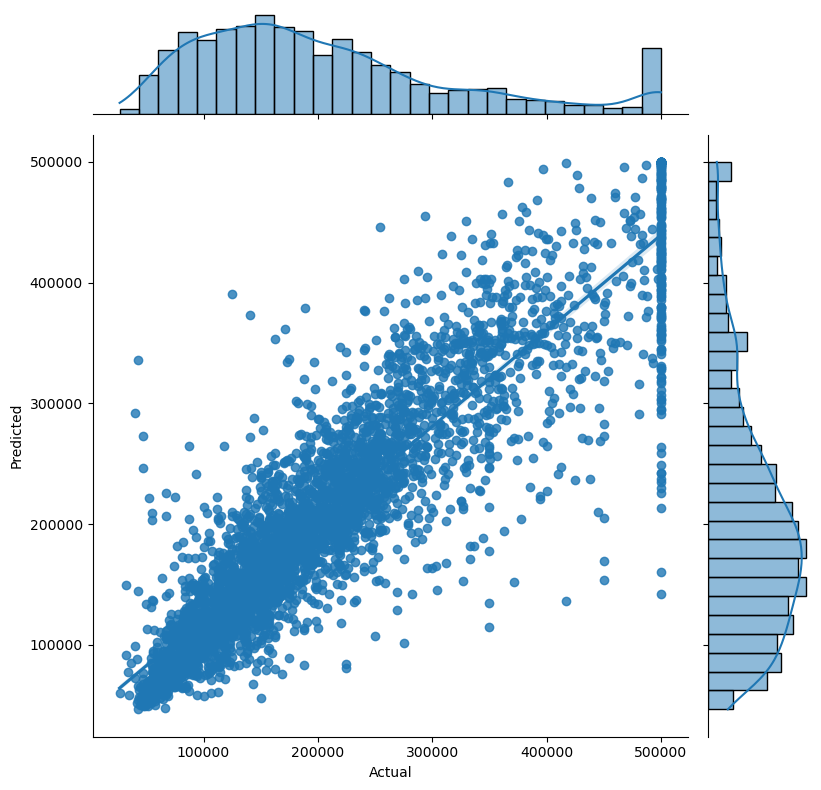

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred2}).reset_index(drop=True)

plt.figure(figsize=(15, 8))
plt.plot(df['Actual'][:50], label='Actual', marker='o')
plt.plot(df['Predicted'][:50], label='Predicted', marker='o')
plt.legend()
plt.title('Random Forest (First 50 Predictions vs Actual Values)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

sns.jointplot(x='Actual', y='Predicted', data=df, kind='reg', height=8)

In [33]:
print(f'r2 score : {forest.score(X_test_s, y_test)}')


r2 score : 0.8126004839464032


In [34]:
forest_score = forest.score(X_test_s, y_test)
forest_rmse = np.sqrt(mean_squared_error(y_test,pred2))

In [35]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [ 200, 300, 400 ],
    "min_samples_split": [ 2, 4 ],
    "max_depth": [ None, 4 ]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                            scoring="neg_mean_squared_error",
                            return_train_score=True,
                            n_jobs=-1)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 4], 'min_samples_split': [2, 4],
                         'n_estimators': [200, 300, 400]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
best_forest = grid_search.best_estimator_

In [37]:
best_forest

RandomForestRegressor(n_estimators=300)

In [38]:
pred3 = grid_search.predict(X_test_s)

In [39]:
print(f'r2 score : {best_forest.score(X_test_s, y_test)}')

r2 score : 0.812746695408406


In [40]:
bf_score = best_forest.score(X_test_s, y_test)
bf_rmse = np.sqrt(mean_squared_error(y_test,pred3))

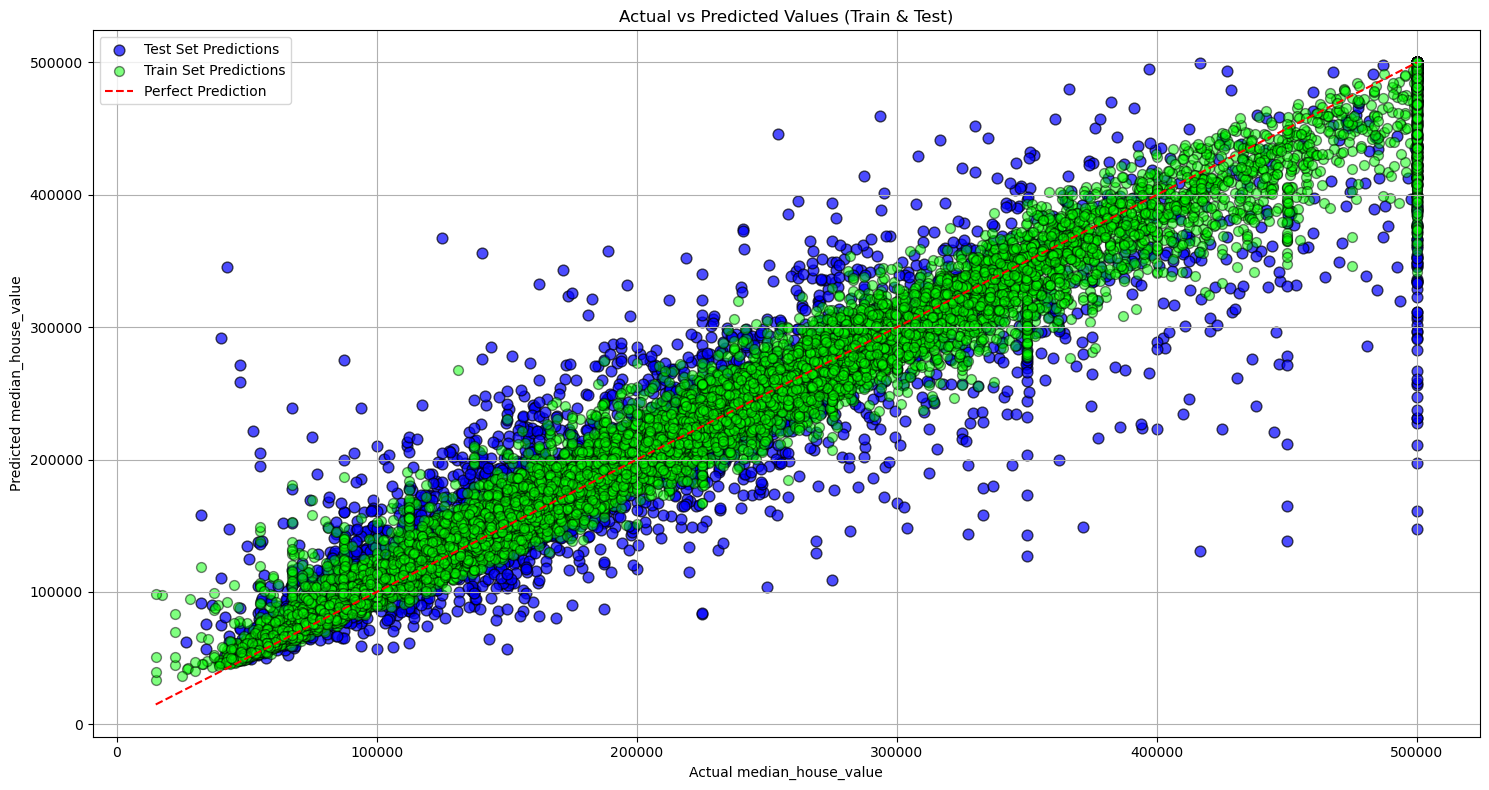

In [41]:
plt.figure(figsize=(15, 8))

plt.scatter(y_test, pred3, label='Test Set Predictions', color='blue', edgecolor='k', alpha=0.7, s=60)

y_train_pred = grid_search.predict(X_train_s)
plt.scatter(y_train, y_train_pred, label='Train Set Predictions', color='lime', edgecolor='k', alpha=0.5, s=50)

min_val = min(min(y_test), min(y_train))
max_val = max(max(y_test), max(y_train))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Actual vs Predicted Values (Train & Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
models = ["Linear","Random Forest", "Random Forest (with hyperparameter)"]
rows = [[lr_score,lr_rmse], [forest_score,forest_rmse], [bf_score,bf_rmse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = rows , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Random Forest (with hyperparameter),0.812747,49898.712831
Random Forest,0.812600,49918.190031
Linear,0.677172,65517.926092
